In [62]:
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns", None)
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import xgboost as xgb

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [2]:
df = pd.read_csv("features_selected_raw.csv").iloc[:,2:37]
df.columns = df.columns.str.replace(' ', '')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FLAG                                            9841 non-null   int64  
 1   Avgminbetweensenttnx                            9841 non-null   float64
 2   Avgminbetweenreceivedtnx                        9841 non-null   float64
 3   TimeDiffbetweenfirstandlast(Mins)               9841 non-null   float64
 4   Senttnx                                         9841 non-null   int64  
 5   ReceivedTnx                                     9841 non-null   int64  
 6   NumberofCreatedContracts                        9841 non-null   int64  
 7   UniqueReceivedFromAddresses                     9841 non-null   int64  
 8   UniqueSentToAddresses                           9841 non-null   int64  
 9   minvaluereceived                         

In [4]:
x, x_hold, y, y_hold = train_test_split(df.iloc[:,1:], df.FLAG, test_size=0.2, random_state=2018)
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.25, random_state=2019)

In [15]:
gbm = xgb.XGBClassifier( 
                       n_estimators=300, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=0.8,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(xtr,ytr),(xte,yte)] #tracking train/validation error as we go
fit_model = gbm.fit(
                    xtr, ytr, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-rmse:0.45901	validation_1-rmse:0.45930
[1]	validation_0-rmse:0.42314	validation_1-rmse:0.42350
[2]	validation_0-rmse:0.39178	validation_1-rmse:0.39259
[3]	validation_0-rmse:0.36425	validation_1-rmse:0.36479
[4]	validation_0-rmse:0.33954	validation_1-rmse:0.34007
[5]	validation_0-rmse:0.31710	validation_1-rmse:0.31797
[6]	validation_0-rmse:0.29648	validation_1-rmse:0.29769
[7]	validation_0-rmse:0.27981	validation_1-rmse:0.28065
[8]	validation_0-rmse:0.26564	validation_1-rmse:0.26685
[9]	validation_0-rmse:0.25222	validation_1-rmse:0.25333
[10]	validation_0-rmse:0.24102	validation_1-rmse:0.24181
[11]	validation_0-rmse:0.23053	validation_1-rmse:0.23156
[12]	validation_0-rmse:0.22110	validation_1-rmse:0.22264
[13]	validation_0-rmse:0.21354	validation_1-rmse:0.21485
[14]	validation_0-rmse:0.20635	validation_1-rmse:0.20739
[15]	validation_0-rmse:0.19998	validation_1-rmse:0.20103
[16]	validation_0-rmse:0.19427	validation_1-rmse:0.19526
[17]	validation_0-rmse:0.18942	validation

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-rmse:0.14878	validation_1-rmse:0.15359
[33]	validation_0-rmse:0.14702	validation_1-rmse:0.15211
[34]	validation_0-rmse:0.14595	validation_1-rmse:0.15118
[35]	validation_0-rmse:0.14511	validation_1-rmse:0.15025
[36]	validation_0-rmse:0.14307	validation_1-rmse:0.14822
[37]	validation_0-rmse:0.14223	validation_1-rmse:0.14744
[38]	validation_0-rmse:0.14138	validation_1-rmse:0.14696
[39]	validation_0-rmse:0.14029	validation_1-rmse:0.14627
[40]	validation_0-rmse:0.13849	validation_1-rmse:0.14505
[41]	validation_0-rmse:0.13647	validation_1-rmse:0.14396
[42]	validation_0-rmse:0.13551	validation_1-rmse:0.14251
[43]	validation_0-rmse:0.13394	validation_1-rmse:0.14073
[44]	validation_0-rmse:0.13297	validation_1-rmse:0.14028
[45]	validation_0-rmse:0.13096	validation_1-rmse:0.13856
[46]	validation_0-rmse:0.12978	validation_1-rmse:0.13757
[47]	validation_0-rmse:0.12897	validation_1-rmse:0.13690
[48]	validation_0-rmse:0.12758	validation_1-rmse:0.13625
[49]	validation_0-rmse:0.12645	

[175]	validation_0-rmse:0.06132	validation_1-rmse:0.10854
[176]	validation_0-rmse:0.06105	validation_1-rmse:0.10884
[177]	validation_0-rmse:0.06035	validation_1-rmse:0.10870
[178]	validation_0-rmse:0.05997	validation_1-rmse:0.10847
[179]	validation_0-rmse:0.05962	validation_1-rmse:0.10854
[180]	validation_0-rmse:0.05940	validation_1-rmse:0.10837
[181]	validation_0-rmse:0.05916	validation_1-rmse:0.10819
[182]	validation_0-rmse:0.05874	validation_1-rmse:0.10812
[183]	validation_0-rmse:0.05861	validation_1-rmse:0.10819
[184]	validation_0-rmse:0.05839	validation_1-rmse:0.10804
[185]	validation_0-rmse:0.05823	validation_1-rmse:0.10802
[186]	validation_0-rmse:0.05790	validation_1-rmse:0.10788
[187]	validation_0-rmse:0.05758	validation_1-rmse:0.10794
[188]	validation_0-rmse:0.05702	validation_1-rmse:0.10785
[189]	validation_0-rmse:0.05677	validation_1-rmse:0.10792
[190]	validation_0-rmse:0.05667	validation_1-rmse:0.10796
[191]	validation_0-rmse:0.05630	validation_1-rmse:0.10769
[192]	validati

In [16]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [17]:
rmse(gbm.predict(xte, ntree_limit=gbm.best_ntree_limit),yte) 

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.11927968090342447

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

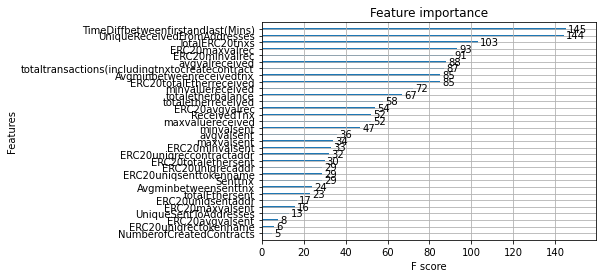

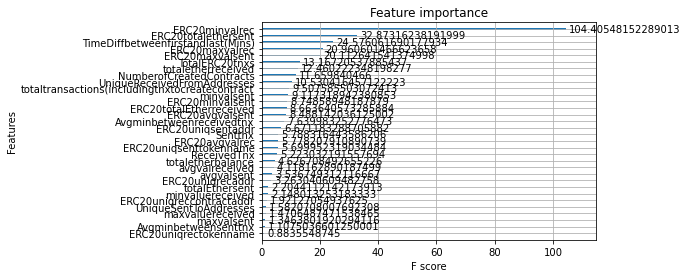

In [18]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

In [19]:
gbm.get_booster().get_score(importance_type='weight') #extract raw frequency scores

{'ERC20minvalrec': 91,
 'TotalERC20tnxs': 103,
 'TimeDiffbetweenfirstandlast(Mins)': 145,
 'ERC20maxvalrec': 93,
 'totaletherreceived': 58,
 'UniqueReceivedFromAddresses': 144,
 'ERC20avgvalrec': 54,
 'totaletherbalance': 67,
 'ERC20totalethersent': 30,
 'ERC20minvalsent': 33,
 'maxvaluereceived': 52,
 'ERC20totalEtherreceived': 85,
 'Senttnx': 29,
 'ERC20uniqsentaddr': 17,
 'ReceivedTnx': 52,
 'totaltransactions(includingtnxtocreatecontract': 87,
 'ERC20maxvalsent': 16,
 'Avgminbetweenreceivedtnx': 85,
 'minvalsent': 47,
 'avgvalreceived': 88,
 'ERC20uniqreccontractaddr': 32,
 'avgvalsent': 36,
 'ERC20avgvalsent': 8,
 'ERC20uniqsenttokenname': 29,
 'NumberofCreatedContracts': 5,
 'totalEthersent': 23,
 'ERC20uniqrecaddr': 29,
 'minvaluereceived': 72,
 'Avgminbetweensenttnx': 24,
 'maxvalsent': 34,
 'UniqueSentToAddresses': 13,
 'ERC20uniqrectokenname': 6}

In [20]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores

{'ERC20minvalrec': 104.40548152289013,
 'TotalERC20tnxs': 13.16720537885437,
 'TimeDiffbetweenfirstandlast(Mins)': 24.576061690177934,
 'ERC20maxvalrec': 20.960601466623658,
 'totaletherreceived': 12.460222348198277,
 'UniqueReceivedFromAddresses': 10.530416457122223,
 'ERC20avgvalrec': 5.778207910890739,
 'totaletherbalance': 4.626708492655226,
 'ERC20totalethersent': 32.87316238191999,
 'ERC20minvalsent': 8.74858948187879,
 'maxvaluereceived': 1.4706487471538465,
 'ERC20totalEtherreceived': 8.663640573285884,
 'Senttnx': 5.788316443586206,
 'ERC20uniqsentaddr': 6.671183288705882,
 'ReceivedTnx': 5.223032191557694,
 'totaltransactions(includingtnxtocreatecontract': 9.507585503072413,
 'ERC20maxvalsent': 20.112641541374998,
 'Avgminbetweenreceivedtnx': 7.639983252776473,
 'minvalsent': 9.117318942380853,
 'avgvalreceived': 4.118162890187499,
 'ERC20uniqreccontractaddr': 1.92127054937625,
 'avgvalsent': 3.536749312116667,
 'ERC20avgvalsent': 8.488142036125002,
 'ERC20uniqsenttokenname':

In [21]:
accuracy_score(ytr, gbm.predict(xtr, ntree_limit=gbm.best_ntree_limit)) 

0.9991531165311653

In [22]:
accuracy_score(yte, gbm.predict(xte, ntree_limit=gbm.best_ntree_limit)) 

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9857723577235772

In [23]:
recall_score(yte, gbm.predict(xte, ntree_limit=gbm.best_ntree_limit)) 

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9455337690631809

In [24]:
precision_score(yte, gbm.predict(xte, ntree_limit=gbm.best_ntree_limit))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9931350114416476

In [54]:
gbm = xgb.XGBClassifier(early_stopping_rounds = 10, eval_metric = "logloss", \
                        )

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [56]:
params = {
#     "n_estimator" : np.linspace(50,301,50),
    "max_depth" : np.arange(3,8,2),
#     "learning_rate" : np.arange(.4,1,.2),
#     "subsample" : np.arange(.4,1,.1),
#     "min_child_weight" : np.linspace(3,13,3),
#     "colsample_bytree" : np.arange(.7,1,.1),
#     "scale_pos_weight" : np.arange(1,2.1,.5),
}

eval_set = [(xte,yte)]

fit_params = {"early_stopping_rounds": 10,
               "eval_metric" : "logloss",
               "eval_set" : "eval_set",
               "min_child_weight": 8}

# Can't include fit_params in the GridSearchCV below?
grid_est = GridSearchCV(estimator=gbm, param_grid=params, cv=kfold, verbose=0, return_train_score=False)
grid_est.fit(xtr, ytr, **fit_params)
griddf = pd.DataFrame(grid_est.cv_results_)
# df["alpha"] = df.params.apply(lambda val: val["alpha"])
# plt.plot(np.log(df.alpha), df.mean_test_score);
grid_est.best_params_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 433, in inner_f
    return f(**kwargs)
TypeError: fit() got an unexpected keyword argument 'min_child_weight'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/

TypeError: fit() got an unexpected keyword argument 'min_child_weight'

In [26]:
grid_est.best_params_

{'colsample_bytree': 0.7999999999999999}

In [ ]:
# https://stackoverflow.com/questions/42993550/gridsearchcv-xgboost-early-stopping

In [60]:
dff = pd.read_csv("features_selected_raw.csv")

In [61]:
dff[dff.FLAG == 1]

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7662,1,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916,16,17.528747,17.529785,0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7663,2,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50,834.77,9622.53,2,2,0,1,2,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346,4,1.532693,1.533785,0.001092,1.0,1.337000,0.0000,0.0,0.0,1.0,0.0,1.0,1.337,1.337,1.337000,0.0,0.0000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
7664,3,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90,31.87,321.42,2,3,0,3,1,0.001020,0.817800,0.439607,0.500390,0.817506,0.658948,5,1.317896,1.318820,0.000924,1.0,1.337000,0.0000,0.0,0.0,1.0,0.0,1.0,1.337,1.337,1.337000,0.0,0.0000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
7665,4,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,1,2300.37,65.10,73091.00,29,98,0,89,26,0.000784,15.729068,0.383225,0.000000,36.700000,1.314957,127,38.133767,37.556046,-0.577721,96.0,142677.382900,120354.7684,0.0,6.0,55.0,0.0,37.0,0.000,26436.081,1954.484697,0.0,81324.0746,5232.816018,22.0,37.0,OCoin,OCoin
7666,5,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,0.008316,2.0,1.337000,0.0000,0.0,0.0,2.0,0.0,2.0,0.000,1.337,0.668500,0.0,0.0000,0.000000,0.0,2.0,,GSENetwork
9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.0,13.370000,0.0000,0.0,0.0,1.0,0.0,1.0,13.370,13.370,13.370000,0.0,0.0000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,-8.715743,5.0,1503.469504,0.0000,0.0,0.0,5.0,0.0,5.0,0.000,1500.000,300.693901,0.0,0.0000,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6.944444444444444
69.44444444444444


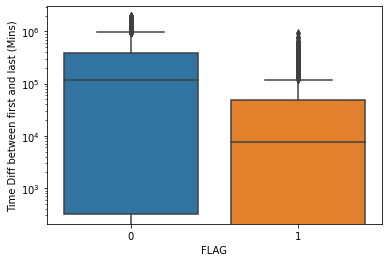

In [86]:
g = sns.boxplot(x = 'FLAG', y='Time Diff between first and last (Mins)', data=dff)
g.set_yscale("log")
print(10**4/60/24)
print(10**5/60/24)

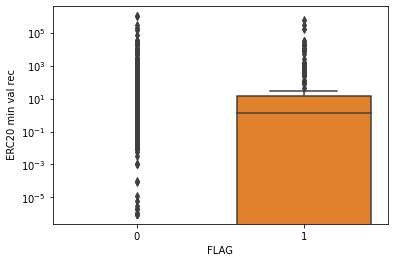

In [81]:
g = sns.boxplot(x = 'FLAG', y=' ERC20 min val rec', data=dff)
g.set_yscale("log")

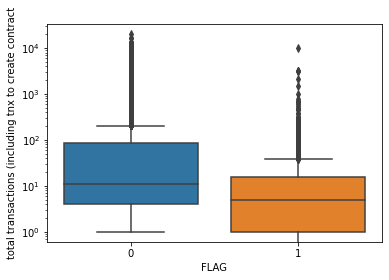

In [79]:
g = sns.boxplot(x = 'FLAG', y='total transactions (including tnx to create contract', data=dff)
g.set_yscale("log")

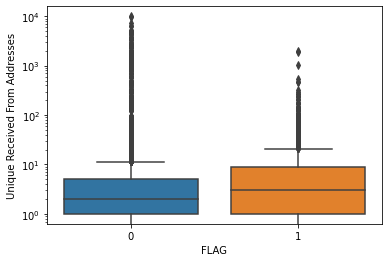

In [83]:
g = sns.boxplot(x = 'FLAG', y='Unique Received From Addresses', data=dff)
g.set_yscale("log")

0.06944444444444445
0.6944444444444444


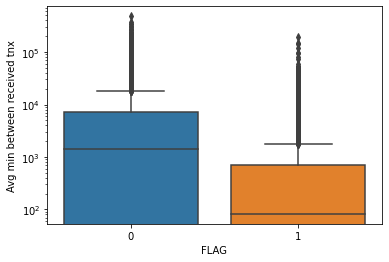

In [88]:
g = sns.boxplot(x = 'FLAG', y='Avg min between received tnx', data=dff)
g.set_yscale("log")
print(10**2/24/60)
print(10**3/24/60)

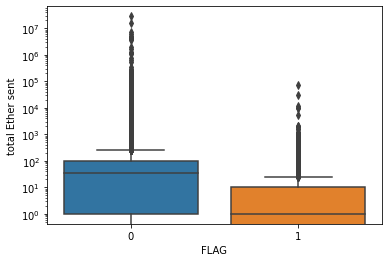

In [89]:

g = sns.boxplot(x = 'FLAG', y='total Ether sent', data=dff)
g.set_yscale("log")

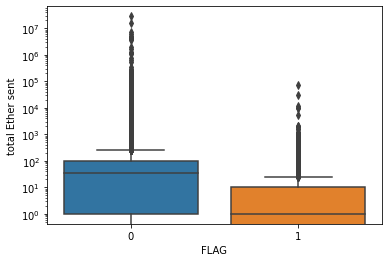

In [77]:
g = sns.boxplot(x = 'FLAG', y='total Ether sent', data=dff)
g.set_yscale("log")

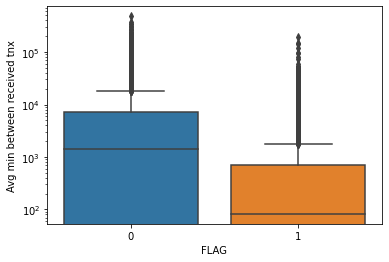

In [78]:
g = sns.boxplot(x = 'FLAG', y='Avg min between received tnx', data=dff)
g.set_yscale("log")

/var/folders/5s/wl47dskn0072dxn6tsvvg4mh0000gn/T/ipykernel_3975/820827107.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


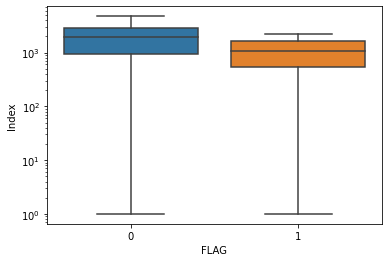

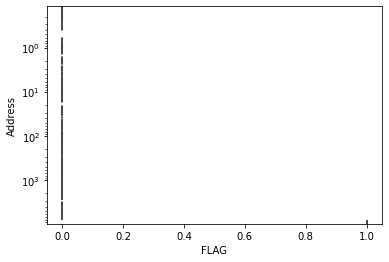

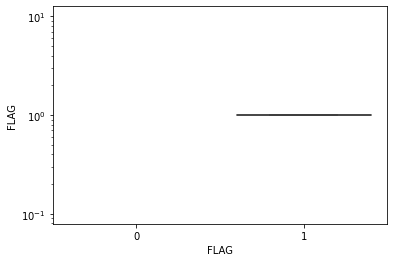

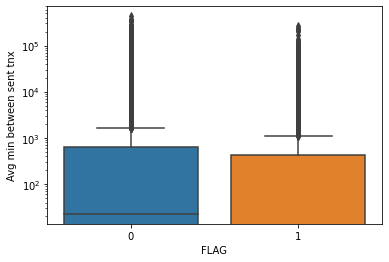

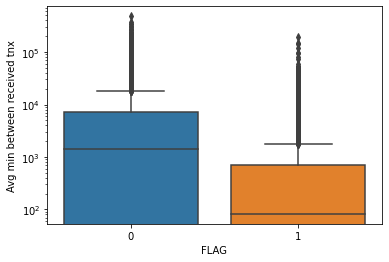

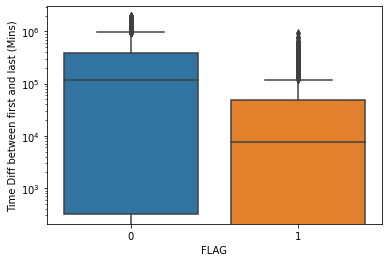

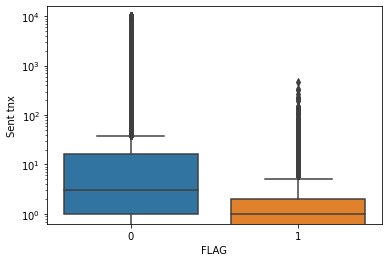

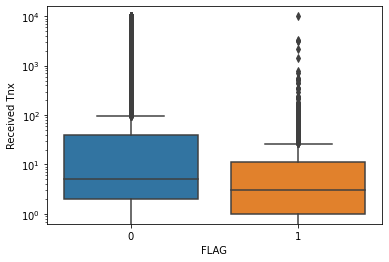

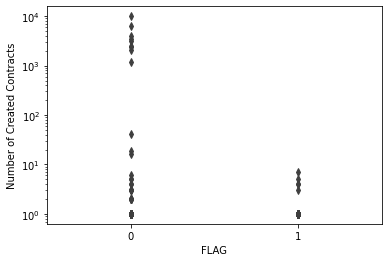

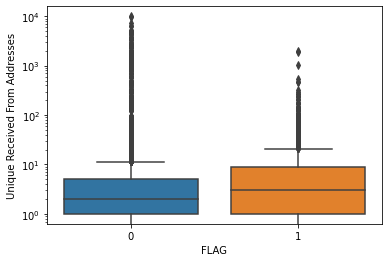

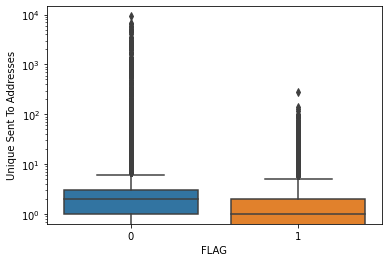

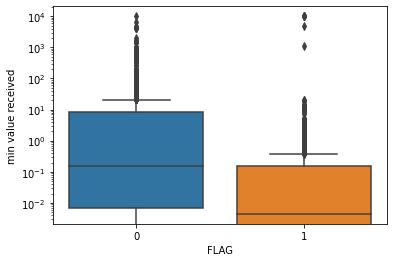

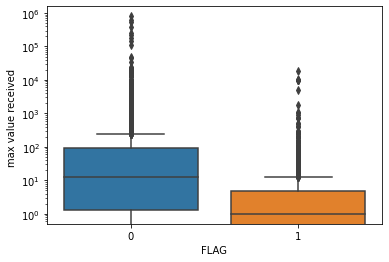

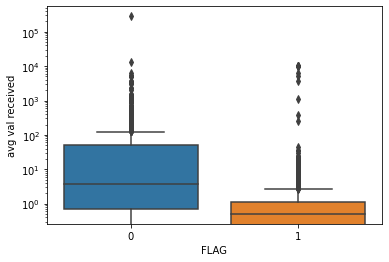

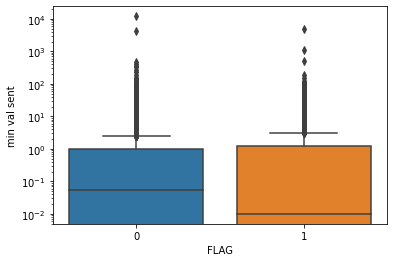

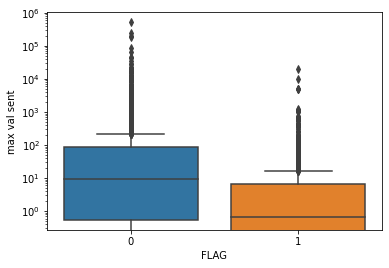

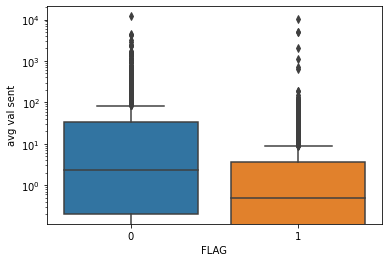

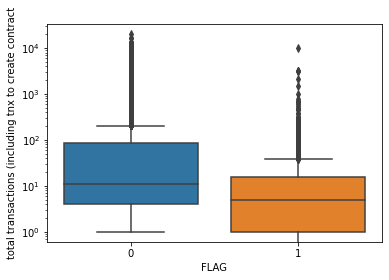

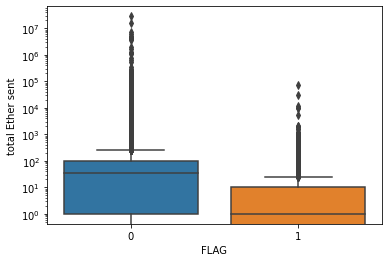

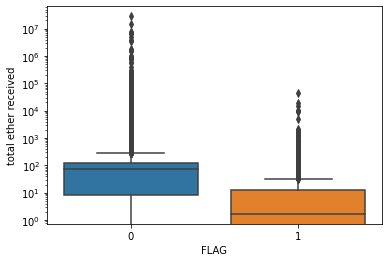

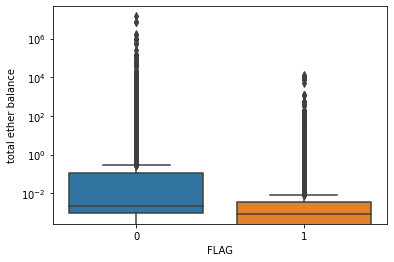

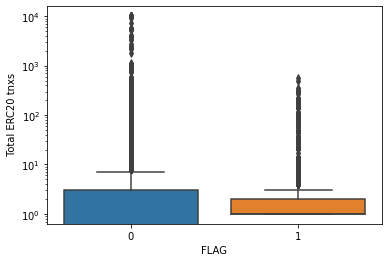

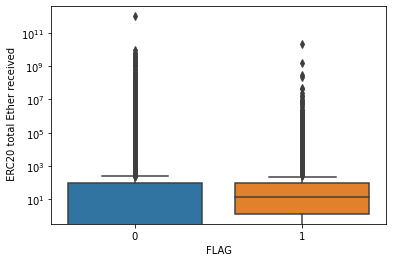

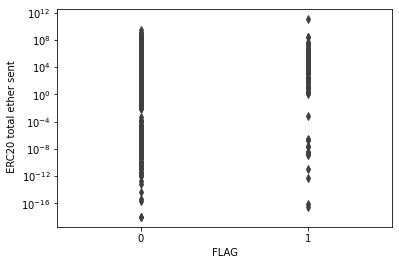

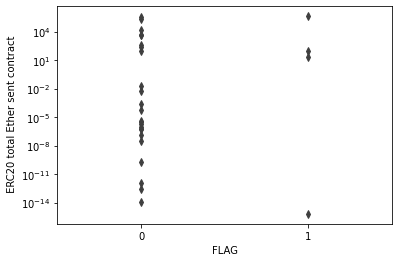

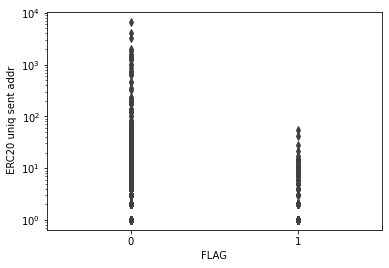

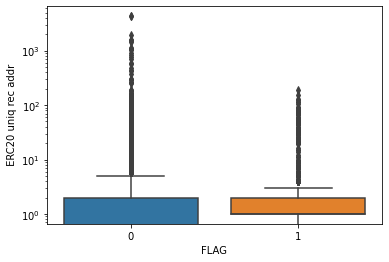

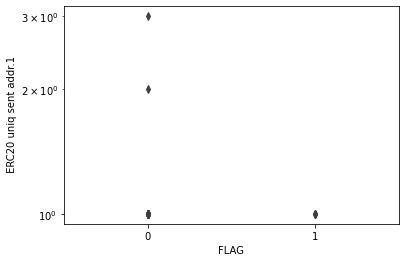

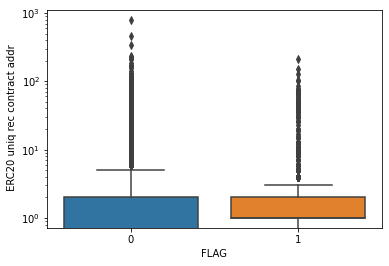

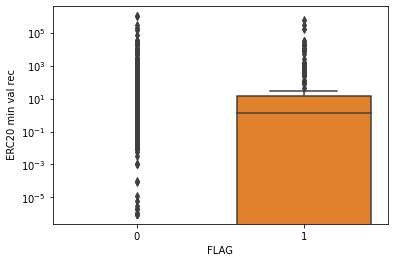

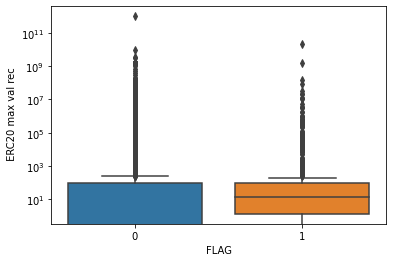

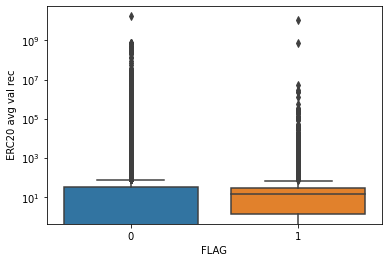

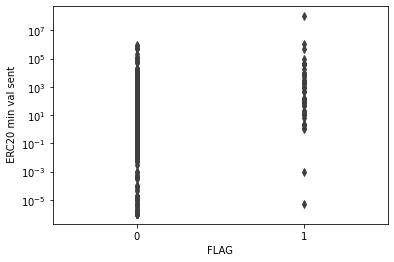

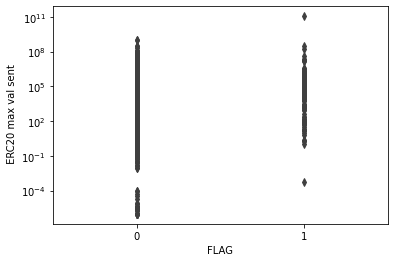

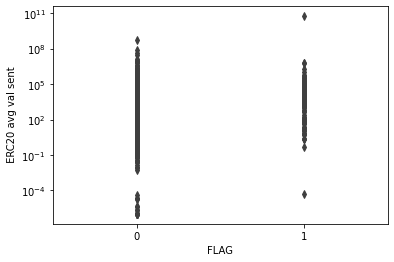

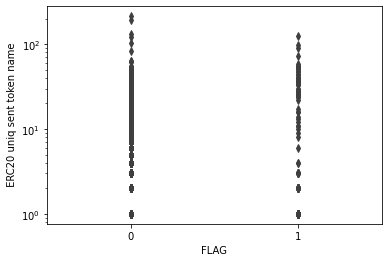

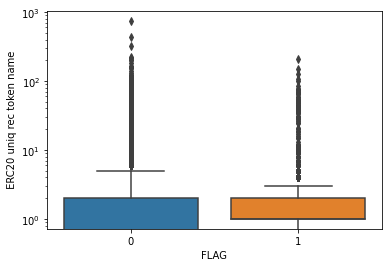

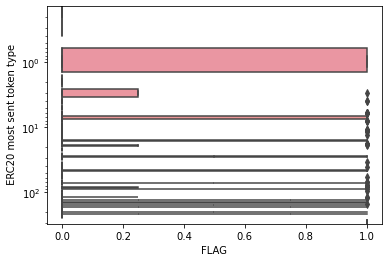

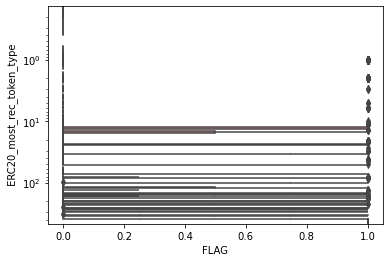

In [91]:
for i, col in enumerate(dff.columns):
    plt.figure(i)
    g = sns.boxplot(x='FLAG', y=col, data=dff)
    g.set_yscale("log")